In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od
od.download('https://www.kaggle.com/datasets/datamunge/sign-language-mnist')

100%|██████████| 62.6M/62.6M [00:02<00:00, 31.9MB/s]


In [ ]:
data=pd.read_csv('/content/sign-language-mnist/sign_mnist_test/sign_mnist_test.csv')

In [ ]:
data

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7167,1,135,119,108,102,105,99,61,103,121,...,108,112,116,114,118,180,184,176,167,163
7168,12,157,159,161,164,166,166,171,174,175,...,213,213,213,214,213,211,210,210,209,208
7169,2,190,191,190,191,190,190,192,192,191,...,216,215,213,214,214,213,210,211,209,208
7170,4,201,205,208,209,214,216,218,223,226,...,112,169,255,255,237,113,91,67,70,63


In [ ]:

import csv
import string
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img


In [ ]:
training_file = '/content/sign-language-mnist/sign_mnist_train/sign_mnist_train.csv'
validation_file = '/content/sign-language-mnist/sign_mnist_test/sign_mnist_test.csv'

In [ ]:
with open(training_file) as training_file:
    line = training_file.readline()
    print(f"First line (header) looks like this:\n{line}")
    line = training_file.readline()
    print(f"Each subsequent line (data points) look like this:\n{line}")

First line (header) looks like this:
label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pix

In [ ]:
def parse_data_from_input(file):
  with open(file) as file:
    reader = csv.reader(file, delimiter=',')
    imgs = []
    labels = []
    next(reader, None)
    for row in reader:
      label = row[0]
      data = row[1:]
      img = np.array(data).reshape((28, 28))
      imgs.append(img)
      labels.append(label)

    images = np.array(imgs).astype(float)
    labels = np.array(labels).astype(float)
    return images, labels

In [ ]:
training_images, training_labels = parse_data_from_input('/content/sign-language-mnist/sign_mnist_train/sign_mnist_train.csv')
validation_images, validation_labels = parse_data_from_input('/content/sign-language-mnist/sign_mnist_test/sign_mnist_test.csv')

print(f"Training images have shape: {training_images.shape}")
print(f"Training labels labels have shape: {training_labels.shape}")

Training images have shape: (27455, 28, 28)
Training labels labels have shape: (27455,)


In [ ]:
print(f"Validation images has shape: {validation_images.shape}")
print(f"Validation labels has shape: {validation_labels.shape}")

Validation images has shape: (7172, 28, 28)
Validation labels has shape: (7172,)


In [ ]:
def plot_categories(training_images, training_labels):
    fig, axes = plt.subplots(3,10, figsize=(16, 15))
    axes = axes.flatten()
    letters = list(string.ascii_lowercase)

    for k in range(30):
        img = training_images[k]
        img = np.expand_dims(img, axis=-1)
        img = array_to_img(img)
        ax = axes[k]
        ax.imshow(img, cmap="Greys_r")
        ax.set_title(f"{letters[int(training_labels[k])]}")
        ax.set_axis_off()

    plt.tight_layout()
    plt.show()

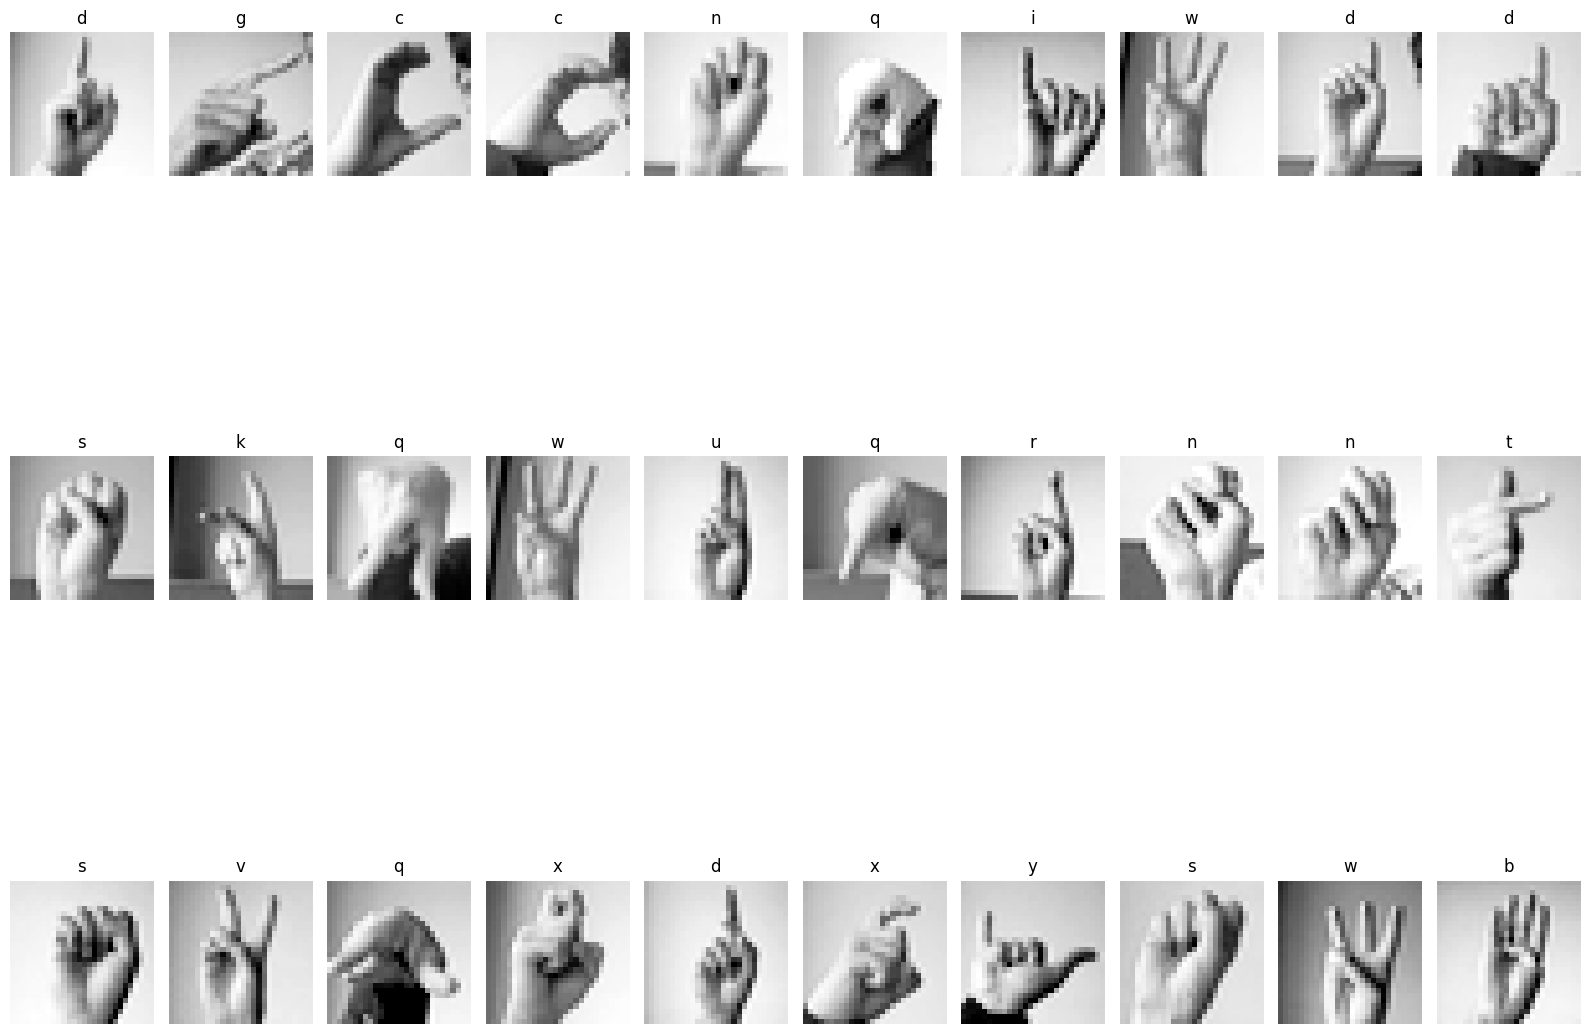

In [ ]:

plot_categories(training_images, training_labels)

In [ ]:
train_df = pd.read_csv('/content/sign-language-mnist/sign_mnist_train/sign_mnist_train.csv')
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [ ]:
train_df.columns

Index(['label', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=785)

In [ ]:
def train_val_generators(training_images, training_labels, validation_images, validation_labels):
    training_images = np.expand_dims(training_images, axis=3)
    validation_images = np.expand_dims(validation_images, axis=3)
    train_datagen = ImageDataGenerator(
        rescale=1. / 255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')
    train_generator = train_datagen.flow(x=training_images,
                                       y=training_labels,
                                       batch_size=32)
    validation_datagen = ImageDataGenerator(rescale=1 / 255)


    validation_generator = validation_datagen.flow(x=validation_images,
                                                 y=validation_labels,
                                                 batch_size=32)


    return train_generator, validation_generator

In [ ]:
train_generator, validation_generator = train_val_generators(training_images, training_labels, validation_images, validation_labels)

print(f"Images of training generator have shape: {train_generator.x.shape}")
print(f"Labels of training generator have shape: {train_generator.y.shape}")
print(f"Images of validation generator have shape: {validation_generator.x.shape}")
print(f"Labels of validation generator have shape: {validation_generator.y.shape}")


Images of training generator have shape: (27455, 28, 28, 1)
Labels of training generator have shape: (27455,)
Images of validation generator have shape: (7172, 28, 28, 1)
Labels of validation generator have shape: (7172,)


In [ ]:
def create_model():
    model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(26, activation='softmax')])
    model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])
    return model

In [ ]:
model = create_model()

In [ ]:
history = model.fit(train_generator,
                    epochs=15,
                    validation_data=validation_generator)


Epoch 1/15
858/858 [==============================] - 14s 16ms/step - loss: 0.5547 - accuracy: 0.8160 - val_loss: 0.2453 - val_accuracy: 0.9197
Epoch 2/15
858/858 [==============================] - 13s 15ms/step - loss: 0.5216 - accuracy: 0.8267 - val_loss: 0.2792 - val_accuracy: 0.9030
Epoch 3/15
858/858 [==============================] - 13s 15ms/step - loss: 0.4810 - accuracy: 0.8379 - val_loss: 0.2194 - val_accuracy: 0.9159
Epoch 4/15
858/858 [==============================] - 13s 15ms/step - loss: 0.4697 - accuracy: 0.8425 - val_loss: 0.2388 - val_accuracy: 0.9154
Epoch 5/15
858/858 [==============================] - 14s 17ms/step - loss: 0.4345 - accuracy: 0.8557 - val_loss: 0.1762 - val_accuracy: 0.9431
Epoch 6/15
858/858 [==============================] - 14s 16ms/step - loss: 0.4210 - accuracy: 0.8582 - val_loss: 0.2349 - val_accuracy: 0.9037
Epoch 7/15
858/858 [==============================] - 14s 17ms/step - loss: 0.4014 - accuracy: 0.8661 - val_loss: 0.1804 - val_accuracy:

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
image_path = '/content/12.jpg'

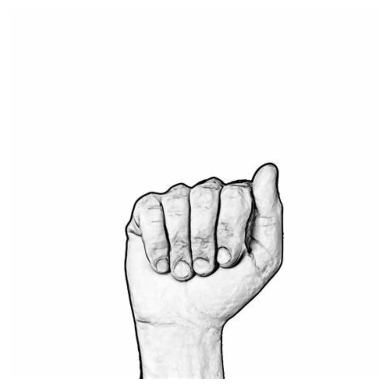

In [ ]:
image = Image.open(image_path).convert('L')
image_array = np.array(image) / 255.0
plt.imshow(image_array, cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
image = Image.open(image_path).convert('L')
image = image.resize((28, 28))
image_array = np.array(image) / 255.0
input_data = image_array.reshape(1, 28, 28, 1)
predictions = model.predict(input_data)
predicted_class = np.argmax(predictions)
letters = list(string.ascii_lowercase)
print("Predicted class:", letters[predicted_class])

1/1 [==============================] - 0s 31ms/step
Predicted class: a


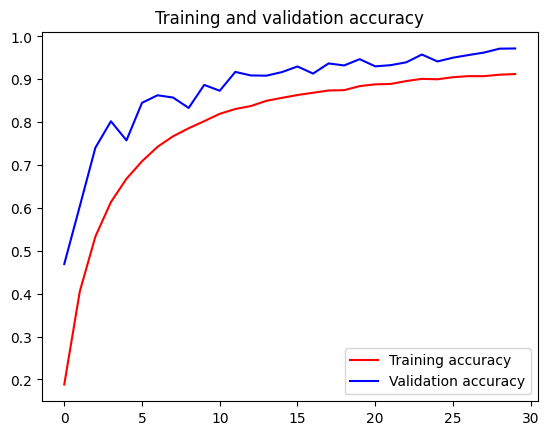

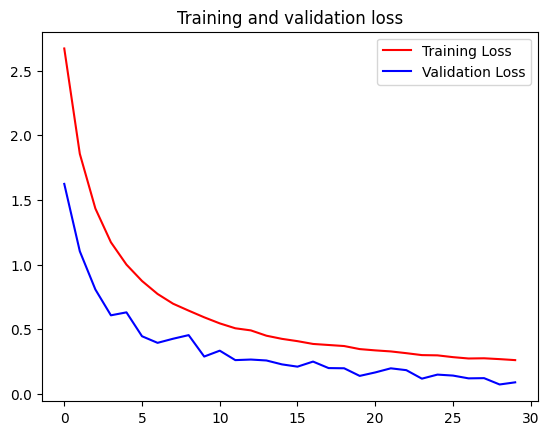

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()